In [1]:
from scipy.misc import imread, imresize, imsave
import numpy as np

In [2]:
import image_utils as iu
import matplotlib.pyplot as plt
from PIL import Image

/home/wgy/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


(412, 550)


/home/wgy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


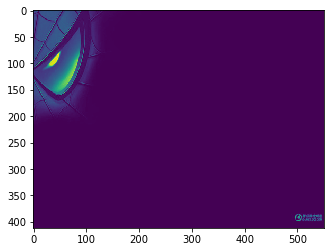

In [5]:
filepath = './test_image/Spidy.jpg'
image = imread(filepath, mode = 'F')
print(image.shape)
plt.imshow(image)
plt.show()

In [6]:
small_img = iu.downsample(image, scale=2)
small_img.shape

(206, 275)

In [7]:
N, data, _ = iu.im_slice(image, size=48, stride=24, num=100, seed=0, mode='normal')
print(N, data.shape)

336 (336, 48, 48, 1)


In [8]:
small_imgs = iu.downsample(data, scale=4, lr_size='same')
small_imgs.shape

(336, 48, 48)

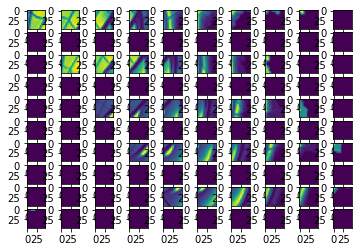

In [9]:
for i, img in enumerate(small_imgs):
    plt.subplot(10, 10, 1+i)
    plt.imshow(img.squeeze())
    if i >= 99:
        break
plt.show()

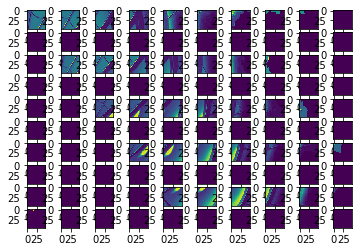

In [10]:
for i, img in enumerate(data):
    plt.subplot(10, 10, 1+i)
    plt.imshow(img.squeeze())
    if i >= 99:
        break
plt.show()

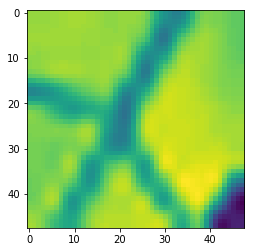

In [11]:
plt.imshow(small_imgs[1])
plt.show()

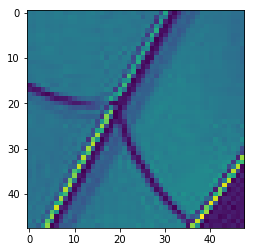

In [12]:
plt.imshow(data[1].squeeze())
plt.show()

In [13]:
def psnr(y_true, y_pred):
	assert y_true.shape == y_pred.shape, "Cannot calculate PSNR. Input shapes not same." \
										 " y_true shape = %s, y_pred shape = %s" % (str(y_true.shape),
																				   str(y_pred.shape))

	return -10. * np.log10(np.mean(np.square(y_pred - y_true)))


In [12]:
data = data.astype(np.float32)/255.
small_imgs = small_imgs.astype(np.float32)/255.
psnr(data, small_imgs)

34.79647397994995

In [13]:
a = np.ones((33, 2, 2, 1))

In [14]:
b = np.array(a).astype('float32') / 255.

In [15]:
print(b[0,:,:,:])

[[[0.00392157]
  [0.00392157]]

 [[0.00392157]
  [0.00392157]]]
